In [1]:
import os
import pandas as pd


In [2]:

# Define the data types you want to extract
data_types = ['intensityMinutes', 'pulseOx']

# Set the folder path to the current directory
folder_path = '/Users/jayswaldhun/Desktop/Spark 506/Garmin Data 6 months/FinalFile'

# Create an empty list to store the dataframes
dfs = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read in the CSV file
        df = pd.read_csv(file_path)
        
        # Filter the dataframe based on the desired data types
        df_filtered = df[df['data_type'].isin(data_types)]
        
        # Add the filtered dataframe to the list of dataframes
        dfs.append(df_filtered)

# Concatenate all the dataframes into one
combined_df = pd.concat(dfs)

# Write the combined dataframe to a new CSV file
combined_df.to_csv('combined6months.csv', index=False)


In [3]:
import pandas as pd

# Read in the CSV file into a dataframe
df = pd.read_csv('combined6months.csv')

# Filter the dataframe based on the desired data types
data_types = ['intensityMinutes', 'pulseOx']
df_filtered = df[df['data_type'].isin(data_types)]

# Convert the dte_tme column to a datetime object
df_filtered['dte_tme'] = pd.to_datetime(df_filtered['dte_tme'])

# Compute the average value for each data type
avg_by_data_type = df_filtered.groupby('data_type')['val'].mean()

# Compute the total value for each data type
total_by_data_type = df_filtered.groupby('data_type')['val'].sum()

# Print the results
print('Average value by data type:')
print(avg_by_data_type)
print('\nTotal value by data type:')
print(total_by_data_type)


Average value by data type:
data_type
intensityMinutes    54.928608
pulseOx             93.173974
Name: val, dtype: float64

Total value by data type:
data_type
intensityMinutes      3876971
pulseOx             457651739
Name: val, dtype: int64


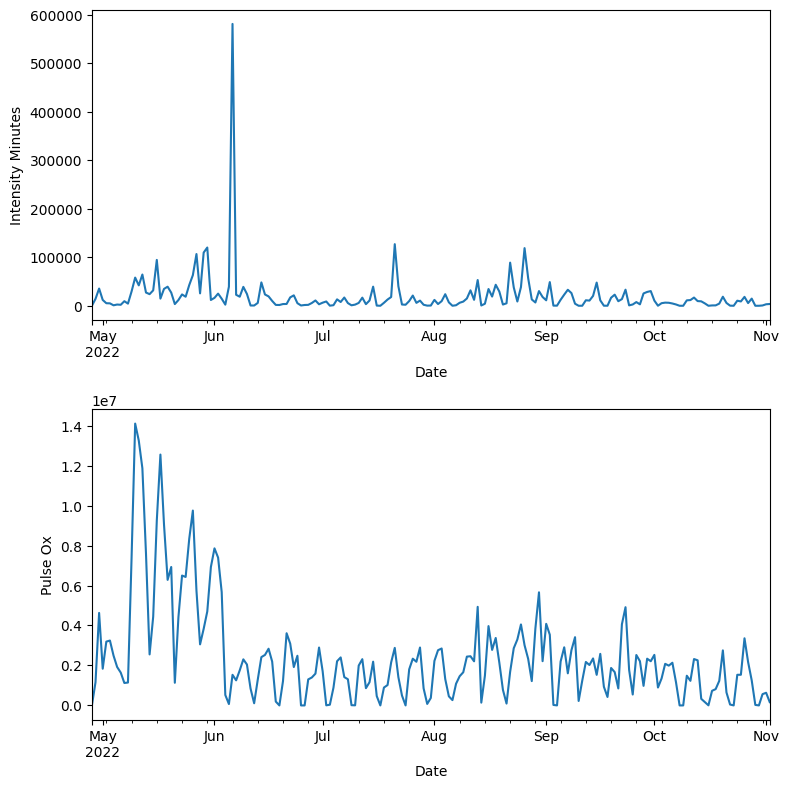

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file into a dataframe
df = pd.read_csv('combined6months.csv')

# Filter the dataframe based on the desired data types
data_types = ['intensityMinutes', 'pulseOx']
df_filtered = df[df['data_type'].isin(data_types)]

# Convert the dte_tme column to a datetime object
df_filtered['dte_tme'] = pd.to_datetime(df_filtered['dte_tme'])

# Group by date and data type to aggregate values
grouped = df_filtered.groupby([pd.Grouper(key='dte_tme', freq='D'), 'data_type']).sum()

# Pivot table to separate data types into separate columns
pivoted = grouped.pivot_table(index='dte_tme', columns='data_type', values='val')

# Plot the graphs
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
pivoted['intensityMinutes'].plot(ax=axs[0])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Intensity Minutes')
pivoted['pulseOx'].plot(ax=axs[1])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Pulse Ox')
plt.tight_layout()
plt.show()


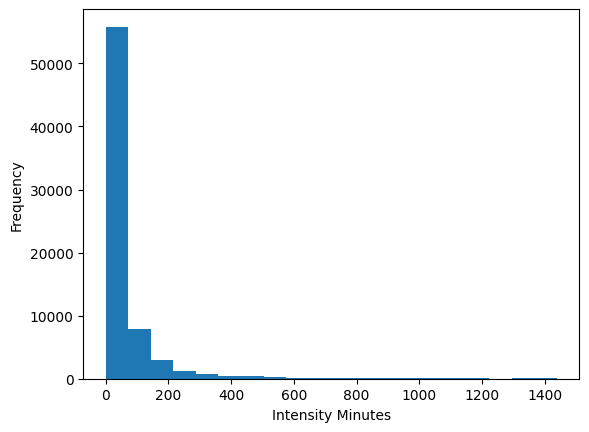

In [5]:
# Plot a histogram of intensityMinutes data
fig, ax = plt.subplots()
ax.hist(df_filtered[df_filtered['data_type'] == 'intensityMinutes']['val'], bins=20)
ax.set_xlabel('Intensity Minutes')
ax.set_ylabel('Frequency')
plt.show()


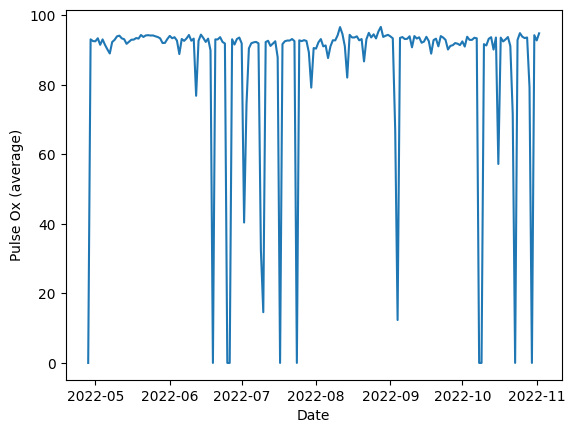

In [6]:
# Calculate daily average pulseOx values
daily_average = df_filtered[df_filtered['data_type'] == 'pulseOx'].groupby(pd.Grouper(key='dte_tme', freq='D'))['val'].mean()

# Plot a line graph of daily average pulseOx values
fig, ax = plt.subplots()
ax.plot(daily_average.index, daily_average.values)
ax.set_xlabel('Date')
ax.set_ylabel('Pulse Ox (average)')
plt.show()


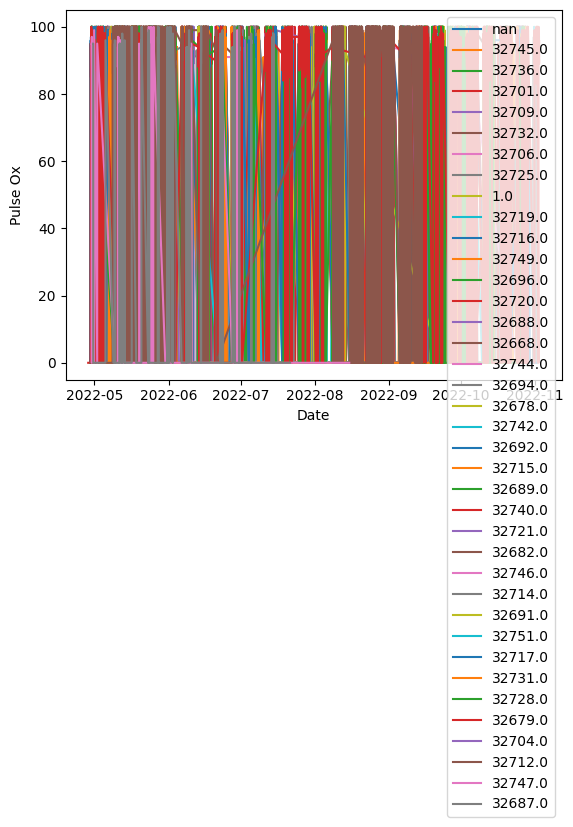

In [7]:
# Plot a line graph of pulseOx values over time, with separate lines for each rsp_id
fig, ax = plt.subplots()
for rsp_id in df_filtered['rsp_id'].unique():
    data = df_filtered[(df_filtered['data_type'] == 'pulseOx') & (df_filtered['rsp_id'] == rsp_id)]
    ax.plot(data['dte_tme'], data['val'], label=rsp_id)
ax.set_xlabel('Date')
ax.set_ylabel('Pulse Ox')
ax.legend()
plt.show()


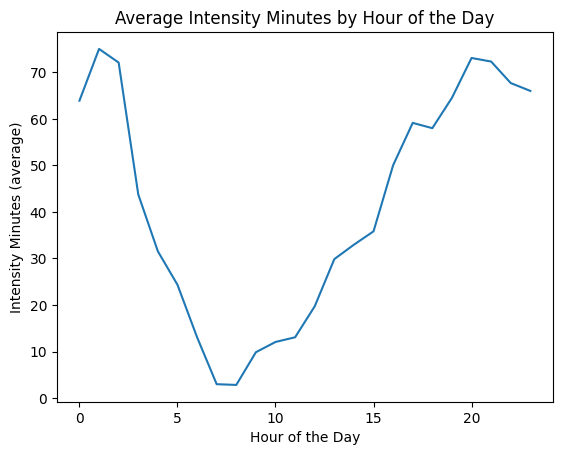

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('combined6months.csv')

# Convert the 'ts' column to datetime format
df['ts'] = pd.to_datetime(df['ts'], unit='s')

# Filter the DataFrame to include only the desired data types
df_filtered = df[df['data_type'].isin(['intensityMinutes', 'pulseOx'])]

# Calculate the hourly averages for intensityMinutes data
hourly_average = df_filtered[df_filtered['data_type'] == 'intensityMinutes'].groupby(df_filtered['ts'].dt.hour)['val'].mean()

# Plot a line graph of average intensityMinutes values for each hour of the day
fig, ax = plt.subplots()
ax.plot(hourly_average.index, hourly_average.values)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Intensity Minutes (average)')
ax.set_title('Average Intensity Minutes by Hour of the Day')
plt.show()
